In [11]:
import nltk
import glob
import os
import re
import warnings; warnings.filterwarnings(action='once')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

In [6]:
path = '../data/'
all_files = glob.glob(os.path.join(path, '*.csv'))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
df = df[['company_name', 'full_complain']]

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/vitor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
def pre_process(text):
    text = str(text)
    small_letters = re.findall(r'\b[A-zÀ-úü]+\b', text.lower())
    
    stopwords = nltk.corpus.stopwords.words('portuguese')
    stop = set(stopwords)
    removed_stop = [word for word in small_letters if word not in stop]
    
    clean_text = ' '.join(removed_stop)
    
    return clean_text

In [10]:
df['processed'] = [0] * df.shape[0]
df['processed'] = df[['full_complain']].applymap(pre_process)
df.head()

,company_name,full_complain,processed
0,mercado-pago,"Eu entrei com uma compra na shopee, me pediram...",entrei compra shopee pediram valor reais envio...
1,mercado-pago,O Instagram da minha amiga foi hakeado e não s...,instagram amiga hakeado sabia pessoa passou pe...
2,mercado-pago,"dia 07/09,recebi uma notificaçao no meu emal q...",dia recebi notificaçao emal descontado cartão ...
3,mercado-pago,Prezado Sr. Stelleo ToldaPeço sua atenção para...,prezado sr stelleo toldapeço atenção resolver ...
4,mercado-pago,Boa tarde! Gostaria de saber a que se refere e...,boa tarde gostaria saber refere debito sendo c...


In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/vitor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
reclamacoes = [complain for complain in df.processed]
texto = ' '.join(reclamacoes)
tokens = word_tokenize(texto, language='portuguese')

freq = FreqDist(tokens)

In [15]:
plt.rcParams.update({'font.size': 19})

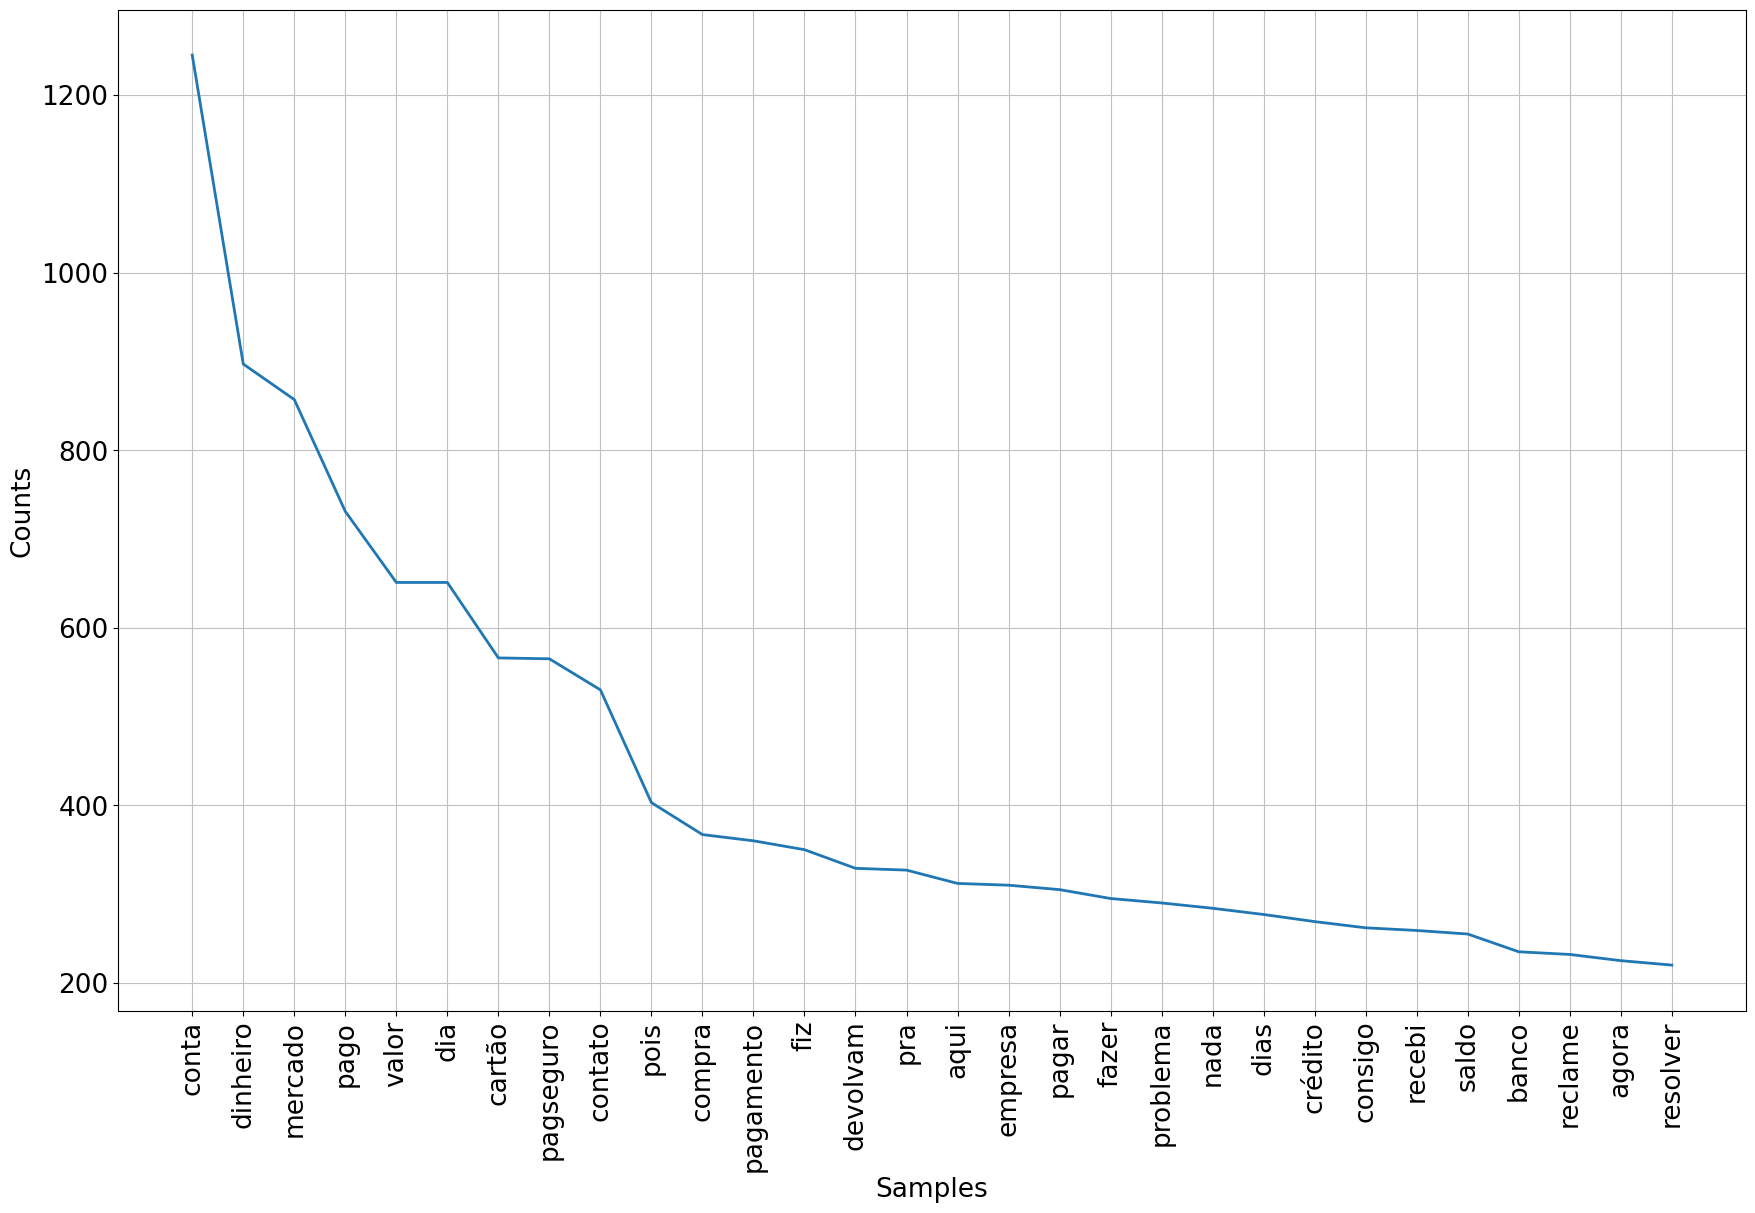

In [16]:
plt.figure(figsize=(21, 13))
plt.tight_layout()
freq.plot(30);

In [17]:
bigrams = nltk.bigrams(tokens)
big_freq = FreqDist(bigrams)

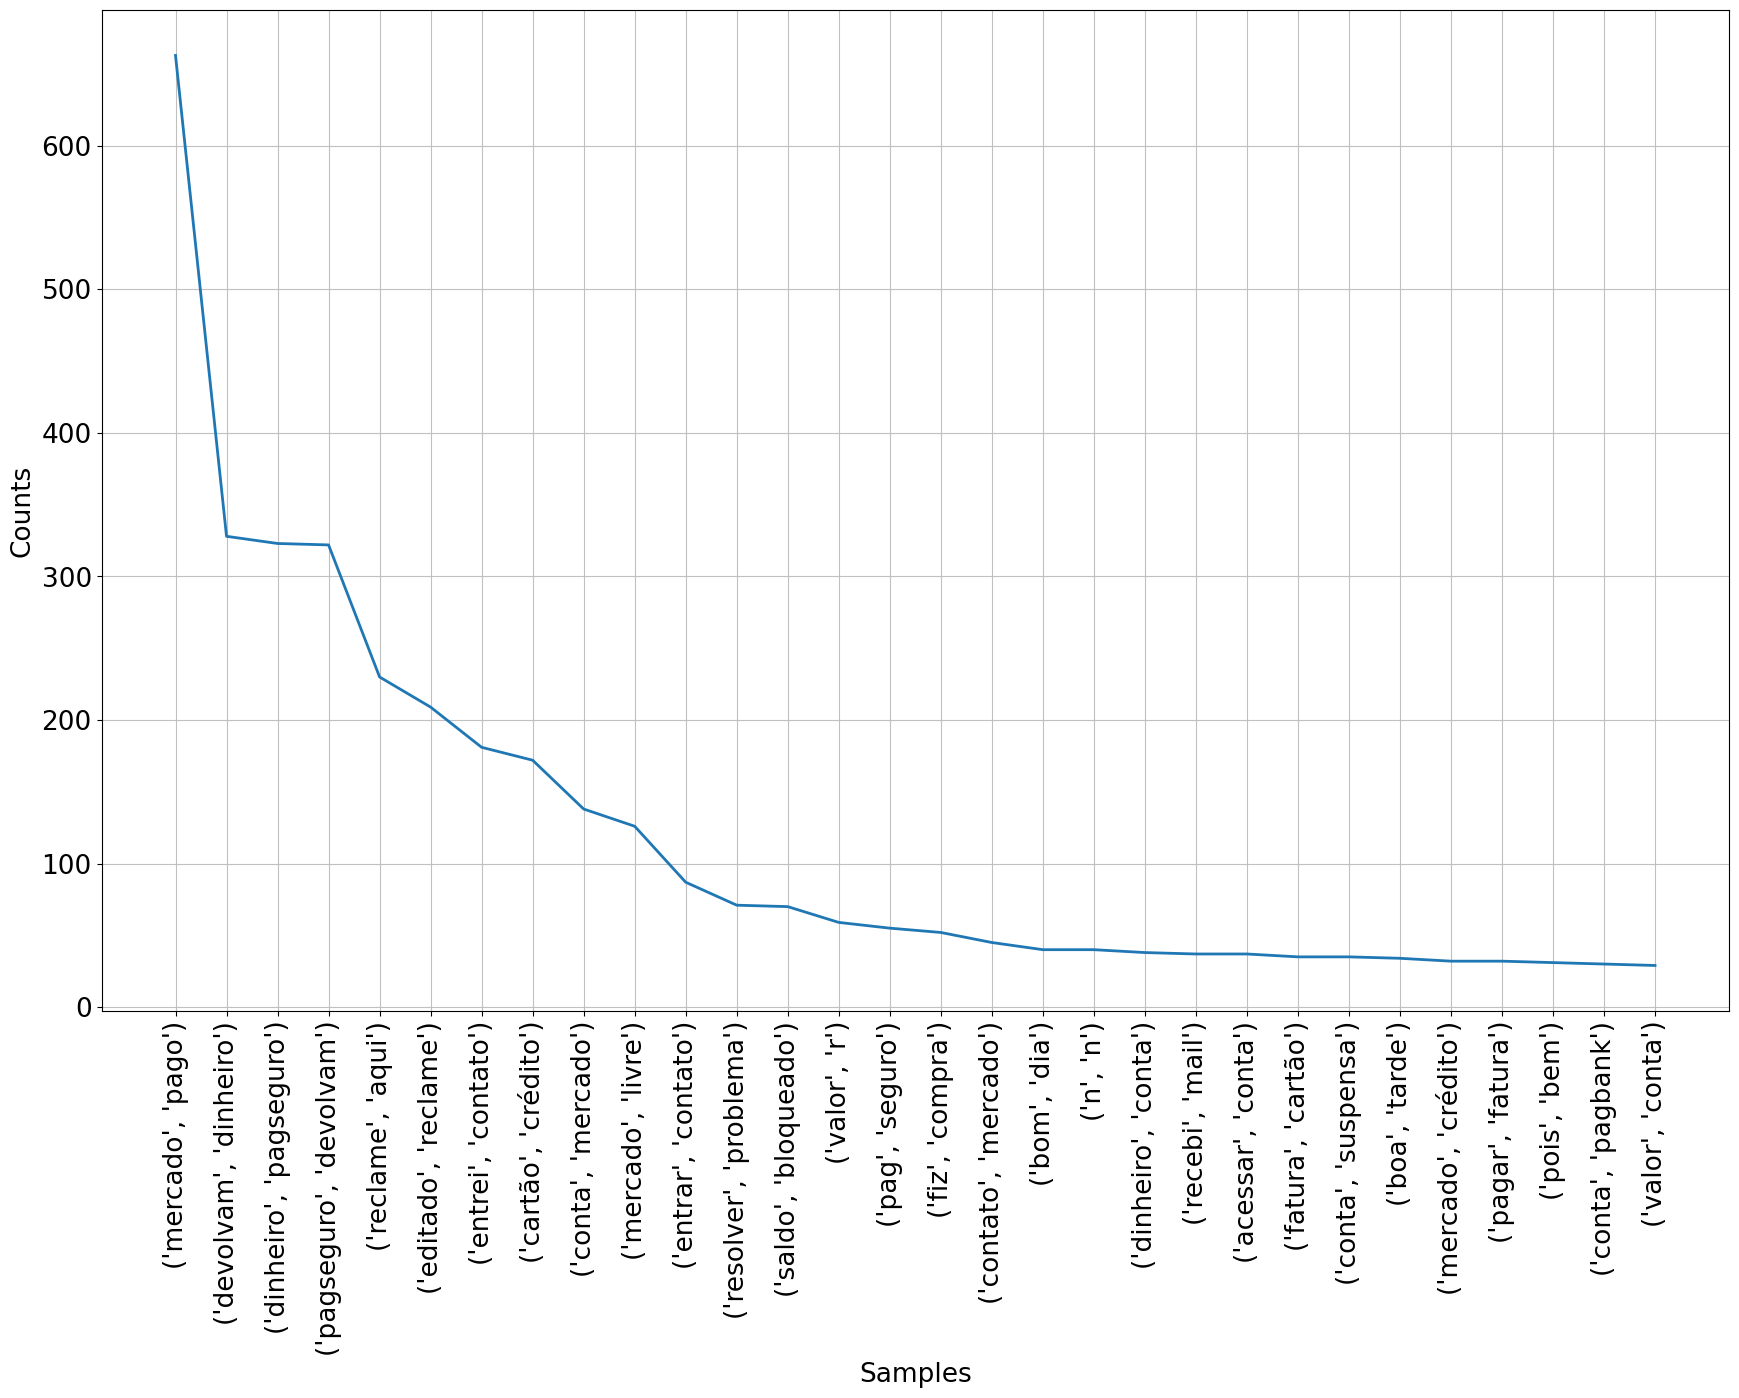

In [18]:
plt.figure(figsize=(21, 13))
plt.tight_layout()
big_freq.plot(30);